In [790]:
import numpy as np
import matplotlib.pyplot as plt

## Simple LM model

In [791]:
def min_sq(x, y):
    x_bar, y_bar = np.mean(x), np.mean(y)
    beta_1 = np.dot(y - y_bar, x - x_bar) / np.linalg.norm(x - x_bar)**2
    beta_0 = y_bar - beta_1 * x_bar
    return [beta_1, beta_0]

In [792]:
np.random.seed(91)
N = 100

a = np.random.normal(loc=2, scale=1, size=N)
b = np.random.randn(1)
x = np.random.randn(N)
y = a * x + b + np.random.randn(N)

a1, b1 = min_sq(x, y)
print(a1, b)

2.203817943318935 [-0.6781313]


In [793]:
xx = x - np.mean(x)
yy = y - np.mean(y)

a2, b2 = min_sq(xx, yy)
print(a2, b2)

2.203817943318935 2.936254619112371e-17


In [794]:
x_seq = np.arange(-5, 5, 0.1)
y_pre = b1 + x_seq * a1
yy_pre = b2 + x_seq * a2

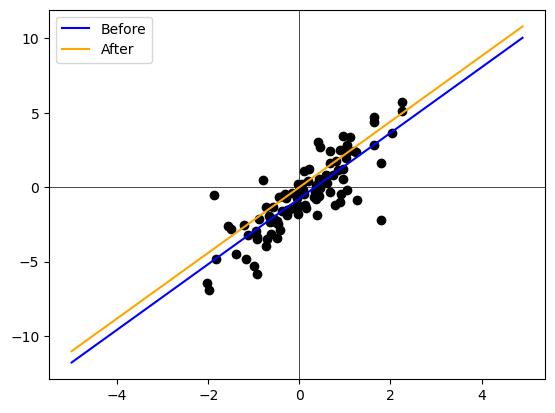

In [795]:
plt.scatter(x, y, c='black')
plt.axhline(y=0, c='black', linewidth=0.5)
plt.axvline(x=0, c='black', linewidth=0.5)
plt.plot(x_seq, y_pre, c='blue', label='Before')
plt.plot(x_seq, yy_pre, c='orange', label='After')
plt.legend(loc='upper left')

## Multiple Regression

In [796]:
N = 100
p = 2
beta = np.array([1, 2, 3])
x = np.random.randn(N, p)
y = beta[0] + beta[1] * x[:, 0] + beta[2] * x[:, 1] + np.random.randn(N)
X = np.insert(x, 0, 1, axis=1)

np.linalg.inv(X.T@X)@X.T@y

array([0.90278533, 1.7945634 , 2.99273718])

## Distributions

In [797]:
import scipy as sc

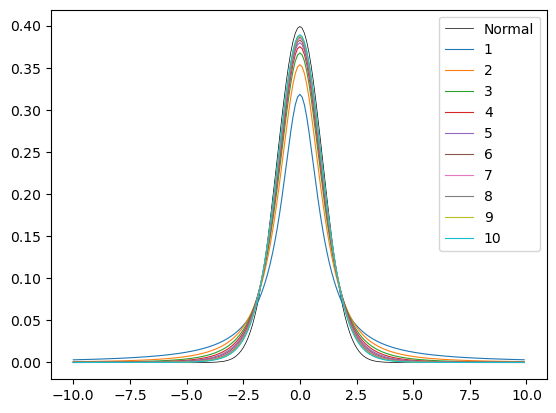

In [798]:
x = np.arange(-10, 10, 0.1)
plt.plot(x, sc.stats.norm.pdf(x, 0, 1), label='Normal', color='black', linewidth=0.5)
for i in range(1, 11):
    plt.plot(x, sc.stats.t.pdf(x, i), label='{}'.format(i), linewidth=0.8)

plt.legend(loc='upper right')

Text(0, 0.5, 'beta_1')

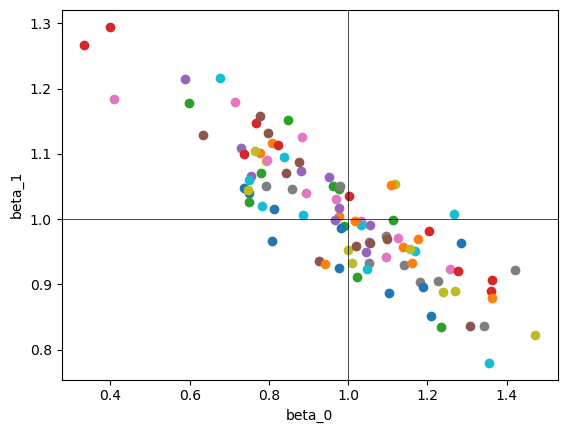

In [799]:
n = 100
p = 1
x_1 = np.zeros(100)
x_2 = np.zeros(100)

for i in range(100):
    x = np.random.randn(n) + 2
    e = np.random.randn(n)
    y = x + 1 + e
    b_1, b_0 = min_sq(x, y)
    x_1[i] = b_0
    x_2[i] = b_1
    plt.scatter(b_0, b_1)

plt.axhline(y=1, c='black', linewidth=0.5)
plt.axvline(x=1, c='black', linewidth=0.5)
plt.xlabel('beta_0')
plt.ylabel('beta_1')


In [800]:
np.corrcoef(x_1, x_2)

array([[ 1.        , -0.87431835],
       [-0.87431835,  1.        ]])

## Hypothesis Testing

$$
H_0 : \beta_i = 0
\\
H_1 : \beta_i \neq 0
$$

$\alpha = 0.05$

In [ ]:
n = 100

x = np.random.randn(n)
y = np.random.randn(n)
beta_1, beta_0 = min_sq(x, y)

X = x.reshape(-1, 1)
X = np.insert(X, 0, 1, axis=1)

RSS = np.linalg.norm(y - x*beta_1 - beta_0)**2
RSE = np.sqrt(RSS / (n - 2))

B_0 = np.linalg.inv(X.T@X)[0, 0]
B_1 = np.linalg.inv(X.T@X)[1, 1]

se_0 = np.sqrt(B_0) * RSE
se_1 = np.sqrt(B_1) * RSE

t_0 = beta_0 / se_0
t_1 = beta_1 / se_1

p_0 = 2 * (1 - sc.stats.t.cdf(np.abs(t_0), n - 2))
p_1 = 2 * (1 - sc.stats.t.cdf(np.abs(t_1), n - 2))

In [802]:
import statsmodels.api as sm

In [803]:
model = sm.OLS(y, X)
res = model.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.009
Model:                            OLS   Adj. R-squared:                 -0.001
Method:                 Least Squares   F-statistic:                    0.8943
Date:                Sat, 13 Sep 2025   Prob (F-statistic):              0.347
Time:                        17:24:56   Log-Likelihood:                -120.32
No. Observations:                 100   AIC:                             244.6
Df Residuals:                      98   BIC:                             249.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0986      0.082     -1.206      0.2

$\beta_1 = 0$

Text(0, 0.5, 'probability density')

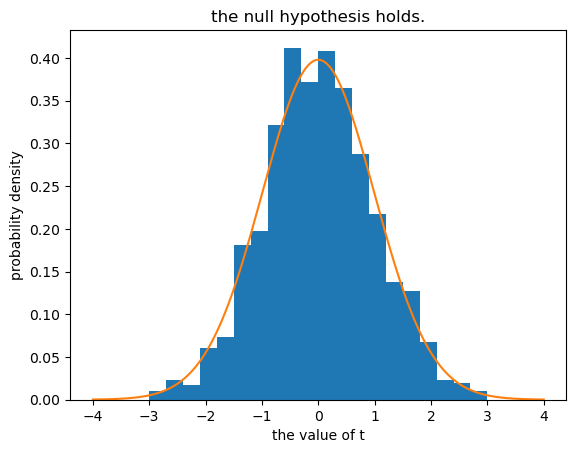

In [822]:
n = 100
r = 1000
T = []
for i in range(r):
    x = np.random.randn(N)
    y = np.random.randn(N)
    X = np.insert(x.reshape(-1, 1), 0, 1, axis=1)

    beta_1, beta_0 = min_sq(x, y)
    pred_y = x*beta_1 + beta_0

    RSS = np.linalg.norm(y - pred_y)**2
    RSE = np.sqrt(RSS / (n - 2))

    B_0 = np.linalg.inv(X.T@X)[0, 0]
    B_1 = np.linalg.inv(X.T@X)[1, 1]

    se_1 = RSE * np.sqrt(B_1)
    T.append(beta_1 / se_1)

plt.hist(T, bins=20, range=(-3, 3), density=True)
x = np.linspace(-4, 4, 400)
plt.plot(x, sc.stats.t.pdf(x, n - 2))
plt.title("the null hypothesis holds.")
plt.xlabel('the value of t')
plt.ylabel('probability density')

Text(0, 0.5, 'probability density')

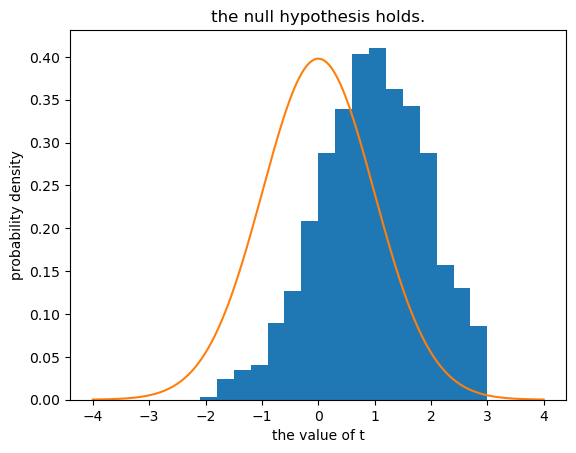

In [823]:
n = 100
r = 1000
T = []
for i in range(r):
    x = np.random.randn(N)
    y = np.random.randn(N) + x*0.1
    X = np.insert(x.reshape(-1, 1), 0, 1, axis=1)

    beta_1, beta_0 = min_sq(x, y)
    pred_y = x*beta_1 + beta_0

    RSS = np.linalg.norm(y - pred_y)**2
    RSE = np.sqrt(RSS / (n - 2))

    B_0 = np.linalg.inv(X.T@X)[0, 0]
    B_1 = np.linalg.inv(X.T@X)[1, 1]

    se_1 = RSE * np.sqrt(B_1)
    T.append(beta_1 / se_1)

plt.hist(T, bins=20, range=(-3, 3), density=True)
x = np.linspace(-4, 4, 400)
plt.plot(x, sc.stats.t.pdf(x, n - 2))
plt.title("the null hypothesis holds.")
plt.xlabel('the value of t')
plt.ylabel('probability density')